In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#rule 3

def rule3(dA,dB):
    dQ = np.sqrt(dA**2+dB**2)
    return dQ

In [4]:
#rule 4

def rule4(q,m,dA,A,n,dB,B):
    dQ = q*np.sqrt((m*dA/A)**2+(n*dB/B)**2)
    return dQ

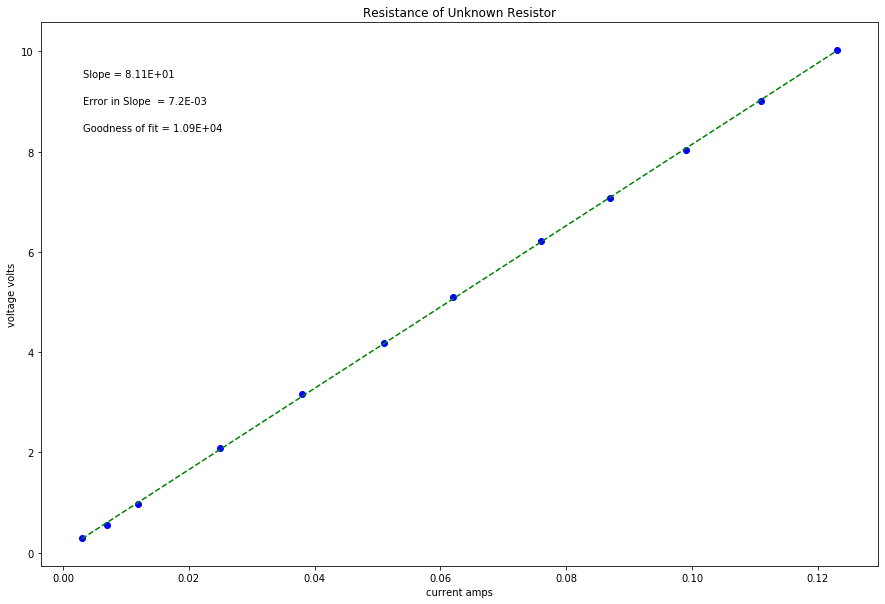

In [5]:
current = np.array ([0.003,0.007,0.012,0.025,0.038,0.051,0.062,0.076,0.087,0.099,0.111,0.123])
voltage = np.array ([0.292,0.559,0.969,2.085,3.170,4.174,5.094,6.224,7.08,8.03,9.01,10.03])
err_voltage = np.array ([0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001])

x = current
y = voltage
dy = err_voltage

b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

fit = b+m*x

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2))
db = np.sqrt(1/D*sum(x**2/dy**2))

def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')

plt.xlabel('current amps')
plt.ylabel('voltage volts')
plt.title('Resistance of Unknown Resistor')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope  = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
